In [55]:
import pytesseract
import cv2
import pyocr 
from PIL import Image
from PIL.ImageOps import invert
import matplotlib.pyplot as plt
import time

In [9]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract.exe'
image = Image.open(img, mode='r').convert("L")
image.save(f'F:/PYcode/Coding/ic/{time.localtime().tm_hour}{time.localtime().tm_min}.png', quality=50)
text = pytesseract.image_to_string(image, lang='chi_sim')
print(text.replace(' ',''))  

|,,

陆林

男“氏旗汉

1988年8月6日′"′_′

云南省宥哈市双龙街道深一标

山村委会:一
民身份号码5303811闹;

bE


In [89]:
# 利用正则匹配出年月日
import re
pattern = re.compile('^(\d{6})(\d{4})(\d{2})(\d{2})(\d{3})([0-9]|X)$')
str = u'51201219850223455X'
resout = pattern.search(str)
# resout = re.match(r'^\d{6}(\d{4})(\d{2})(\d{2})\d{3}', str)
print(resout.group(1))
print(resout.group(2))
print(resout.group(3))
print(resout.group(4))
print(resout.group(5))
print(resout.group(6))

512012
1985
02
23
455
X


In [90]:
img_dict = {"name": [[109, 40],[217, 89]],
           "gender": [[109, 89], [160, 143]],
           "nation": [[236, 89], [280, 143]],
           "year": [[109, 143], [179, 192]],
           "month": [[203, 143], [233, 192]],
           "day": [[260, 143], [295, 192]],
           "address": [[109, 192], [376, 268]],
           "IDnumber": [[199, 310], [547, 376]],
           "img": [[376, 58], [559, 297]]}

In [91]:
# for name, img_data in img_dict.items():
#     print(name)
#     name = image[img_data[0][0]:img_data[1][0], img_data[0][1]: img_data[1][1]]
#     cv2.imshow(f"{name}",name)

image = cv2.imread("result_done41.jpg", cv2.IMREAD_GRAYSCALE)
ret, mask = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
new_img_dict = {}
for i in img_dict:
    new_img_dict[i] = image[img_dict[i][0][1]:img_dict[i][1][1], img_dict[i][0][0]: img_dict[i][1][0]]

In [92]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract.exe'
for i_img in new_img_dict:
#     print(i_img)
    if new_img_dict[i_img].shape[1] < 50:
        new_img_dict[i_img] = cv2.resize(new_img_dict[i_img], (0, 0), fx=5, fy=5, interpolation=cv2.INTER_NEAREST)
        print("****")
        text4 = pytesseract.image_to_string(new_img_dict[i_img], lang='chi_sim')
        print(text4.replace(' ',''))    
        print("****")

    else:
        if i_img == "nation":
            text1 = pytesseract.image_to_string(new_img_dict[i_img], lang='nation')
            print(text1.replace(' ','')) 
        elif i_img == "IDnumber":
            text2 = pytesseract.image_to_string(new_img_dict[i_img], lang='idnum')
            print(text2.replace(' ',''))  
        elif i_img == "gender":
            text3 = pytesseract.image_to_string(new_img_dict[i_img], lang='sex')
            print(text3.replace(' ',''))  

        text = pytesseract.image_to_string(new_img_dict[i_img], lang='chi_sim')
    #     cv2.imwrite(f"{i_img}.jpg", new_img_dict[i_img])
        print(f"{i_img}:{text.replace(' ','')}")         

name:陆林

gender:
****

****
year:1988
****

****
****

****
address:云南省宣威市观龙街道淑
山村委会视园园国善
5303011NWDH
IDnumber:5503811闵吴园
img:


In [93]:
import cv2

# 读取一张照片
img = cv2.imread('month.jpg')

# 缩放成200x200的图像
img_200x200 = cv2.resize(img, (60, 80))

# 不直接指定缩放后大小，通过fx和fy指定缩放比例，0.5则长宽都为原来一半
# 等效于img_200x300 = cv2.resize(img, (300, 200))，注意指定大小的格式是(宽度,高度)
# 插值方法默认是cv2.INTER_LINEAR，这里指定为最近邻插值
img_200x300 = cv2.resize(img, (0, 0), fx=5, fy=5, interpolation=cv2.INTER_NEAREST)

cv2.imshow('resized_200x200.jpg', img_200x200)
cv2.imshow('resized_200x300.jpg', img_200x300)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
image = cv2.imread("result_done41.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow("jj", image[40: 89, 109: 217])
cv2.waitKey(0)
cv2.destroyAllWindows()

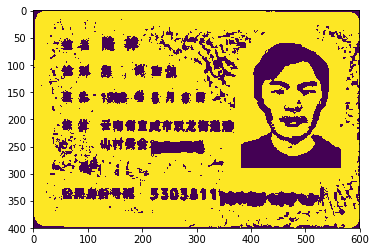

In [18]:
plt.imshow(image)
plt.show()